In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Mall_Customers.csv')  

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (200, 5)

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [22]:
print("Missing Values:\n", df.isnull().sum())

# Preprocessing
# Binary encode Gender feature
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Assignment 1 - perform EDA on the dataset

In [23]:
# ASSIGNMENT BEGIN

df.info() # check dataset structure
print(f"\nDuplicate values:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB

Duplicate values: 0


           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


<Axes: xlabel='Gender', ylabel='count'>

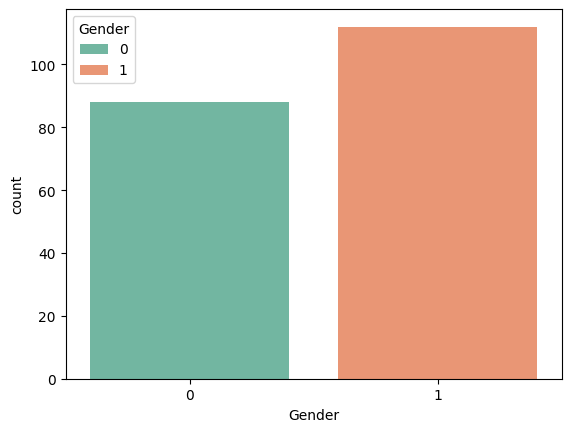

In [24]:
# univariate analysis of each feature
df_analysis = df.drop("CustomerID", axis = 1) # drop customerID for analysis as it's just an identifier
print(df_analysis.describe()) # counts are all 200; ranges, mean, max and min are reasonable  
sns.countplot(x = "Gender", data = df_analysis, hue = "Gender", palette = "Set2") # classes appear imbalanced

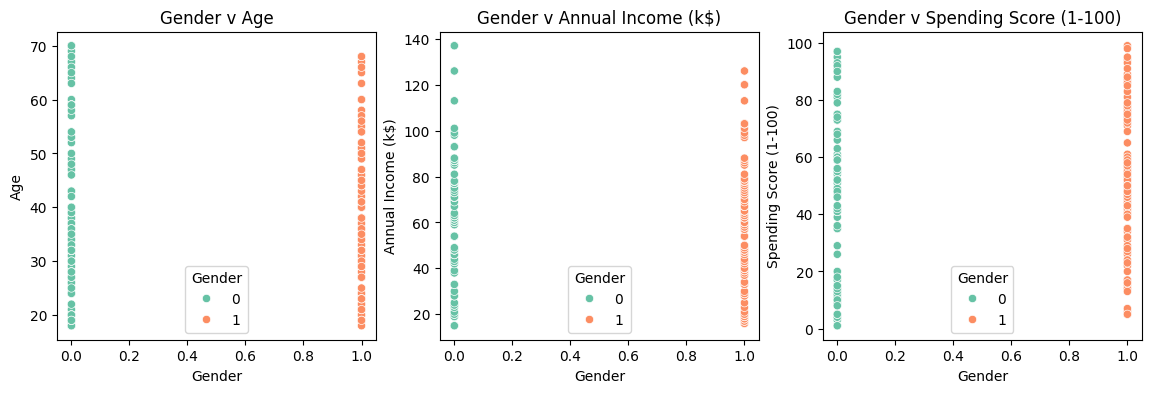

In [25]:
# bivariate analysis - feature v target
fig, axes = plt.subplots(1, 3, figsize = (14, 4))
sns.scatterplot(x = "Gender", y = "Age", data = df, hue = "Gender", palette = "Set2", ax = axes[0])
axes[0].set_title("Gender v Age")

sns.scatterplot(x = "Gender", y = "Annual Income (k$)", data = df, hue = "Gender", palette = "Set2", ax = axes[1])
axes[1].set_title("Gender v Annual Income (k$)")

sns.scatterplot(x = "Gender", y = "Spending Score (1-100)", data = df, hue = "Gender", palette = "Set2", ax = axes[2])
axes[2].set_title("Gender v Spending Score (1-100)")

plt.show()

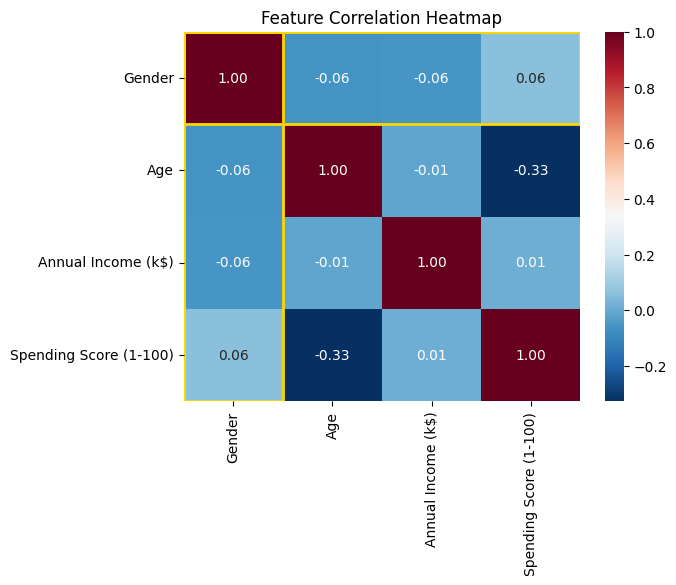

In [ ]:
# multivariate analysis - feature v feature
# scatterplots again or heatmap 
corr = df_analysis.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu_r', fmt = '.2f')

import matplotlib.patches as patches # formatting to highlight target variable

ax = plt.gca()
n = corr.columns.get_loc("Gender") 
i = corr.index.get_loc("Gender")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

plt.title('Feature Correlation Heatmap')
plt.show() # looks like only age and spending score have significant correlation with each other

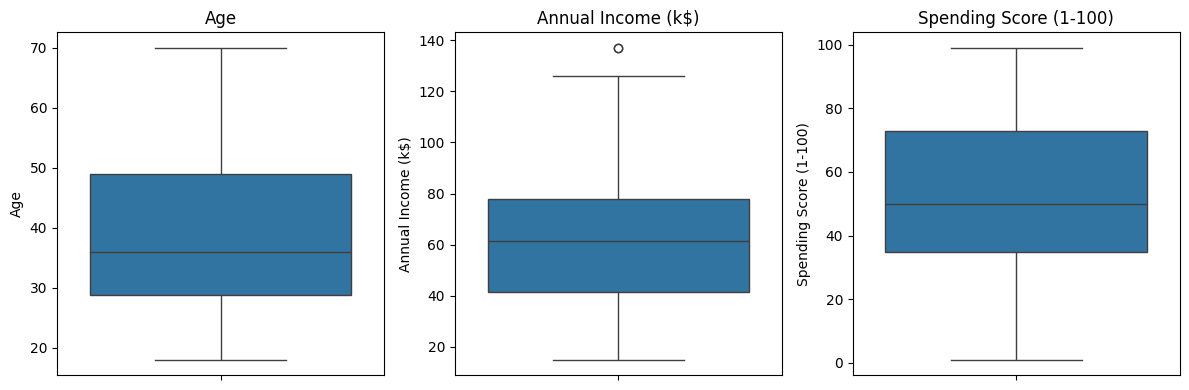

In [ ]:
# data quality checks
# use boxplots or z-scores to identify outliers
# ensure sonsistent spelling
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes = axes.flatten() # make numpy axes into 1D array for looping
for i, col in enumerate(cols):
    sns.boxplot(y = df[col], ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show() # outlier in annual income, and skewed data for age and annual income.

In [ ]:
# ASSIGNMENT END
# Select some features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [29]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)